## Jupiter noteboook voorbeelden basemodel

Hieronder gaan verschillende voorbeelden staan vanopties die je hebt bij de basemodel package.
Er zijn verschillende dingen die je kunt aanpassen pas wel op dat je de waarde niet te hoog of te laag maakt dit kan zorgen voor errors.

### Complete voorbeeld

Als eerste zie je het complete voorbeeld. Je kunt je eigen data importeren en gebruiken. Het is echter handig als je kennis hebt van de statistische modellen, aangezien alle parameters vervolgens aangepast moeten worden. Ook kun je de 'linspace' aanpassen om te testen of je bij andere waarden een beter resultaat krijgt

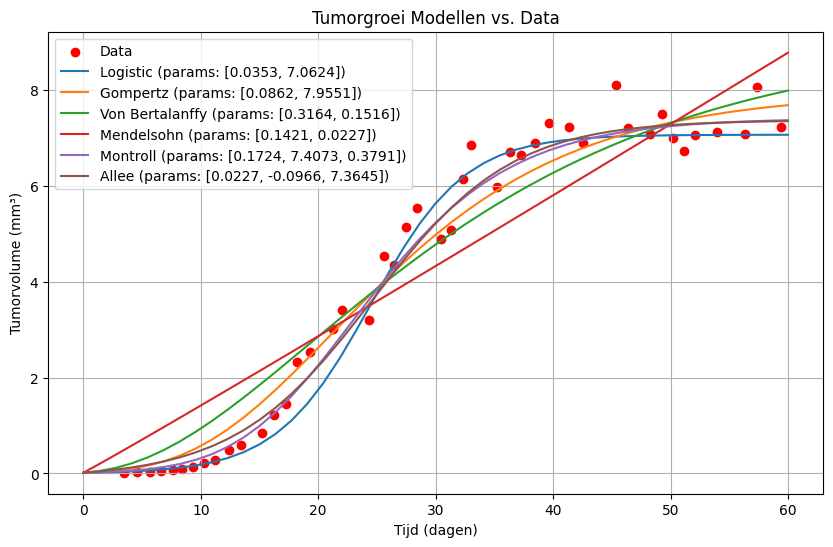

                                               Formule        AIC        BIC
Montroll               dV/dt = c * V * (V_max^d - V^d) -94.597717 -89.177729
Allee            dV/dt = c * (V - V_min) * (V_max - V) -90.669771 -85.249784
Gompertz                   dV/dt = c * V * ln(V_max/V) -74.744951 -71.131626
Logistic                   dV/dt = c * V * (V_max - V) -70.101555 -66.488230
Von Bertalanffy            dV/dt = c * V^(2/3) - d * V -43.391996 -39.778671
Mendelsohn                             dV/dt = c * V^d  -4.979503  -1.366178


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basemodel import DataHandler, Evaluator, LogisticModel, GompertzModel, VonBertalanffyModel, MendelsohnModel, MontrollModel, AlleeModel

# Voeg hier je eigen data toe
t_data = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
V_data = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

# Instantieer de evaluator
evaluator = Evaluator(t_data, V_data)

# Definieer de modellen en beginwaarden voor parameters
t_forecast = np.linspace(0, 60, 45)
models = {
    'Logistic': (LogisticModel, [0.01, 7]),
    'Gompertz': (GompertzModel, [0.11, 7.5]),
    'Von Bertalanffy': (VonBertalanffyModel, [0.5, 0.2]),
    'Mendelsohn': (MendelsohnModel, [0.01, 0.1]),
    'Montroll': (MontrollModel, [0.01, 8, 0.1]),
    'Allee': (AlleeModel, [0.05, 0, 7.5])
}

# Modelvergelijking
results = evaluator.compare_models(models, t_forecast)

# Visualiseer de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(t_data, V_data, color="red", label="Data")

for model_name, result in results.items():
    params = result['params']  
    param_str = ", ".join([f"{p:.4f}" for p in params])  
    plt.plot(t_forecast, result['V_sim'], label=f"{model_name} (params: [{param_str}])")

plt.title("Tumorgroei Modellen vs. Data")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Tumorvolume (mm³)")
plt.legend()
plt.grid(True)
plt.show()


df = pd.DataFrame.from_dict(results, orient='index')
df = df[['Formule','AIC', 'BIC']].sort_values(by='AIC')
print(df)


### Resultaten 

De resultaten die je terugkrijgt zijn een grafiek van alle modellen, de beste parameters die voor die modellen zijn gevonden, en de AIC en BIC scores.

AIC (Akaike Information Criterion): Deze maat is bedoeld om het evenwicht te vinden tussen het modelcomplexiteit en de nauwkeurigheid. Een lager AIC-waarde geeft een beter model.
BIC (Bayesian Information Criterion): Net als AIC, maar strenger; het bevat een extra term die rekening houdt met de complexiteit van het model. Een lager BIC-waarde geeft ook aan dat het model beter is, maar het is vaak strikter in wat het accepteert als een goed model dan AIC.

## Voorbeeld 1

Je kunt ook individuele modellen plot dat doe je zo:

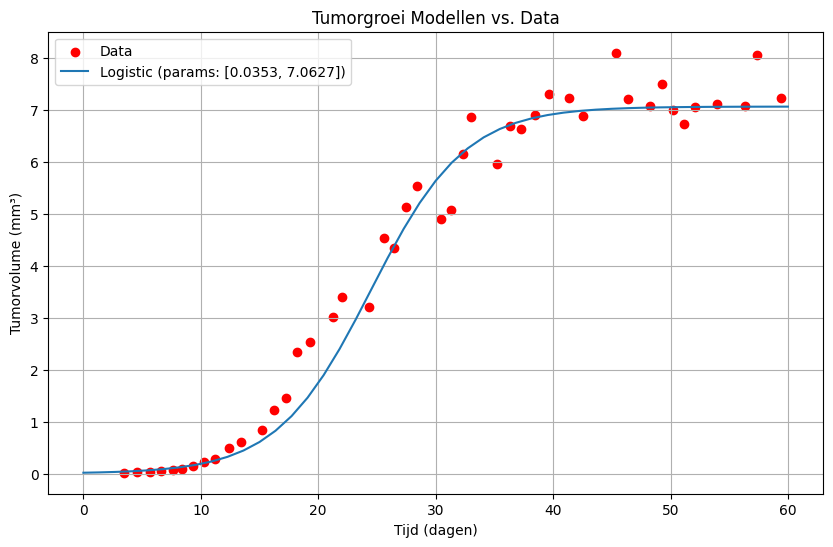

                              Formule        AIC        BIC
Logistic  dV/dt = c * V * (V_max - V) -70.101572 -66.488247


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basemodel import DataHandler, Evaluator, LogisticModel, GompertzModel, VonBertalanffyModel, MendelsohnModel, MontrollModel, AlleeModel

# Voeg hier je eigen data toe
t_data = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
V_data = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

# Instantieer de evaluator
evaluator = Evaluator(t_data, V_data)

# Definieer de modellen en beginwaarden voor parameters
t_forecast = np.linspace(0, 60, 45)
models = {
    'Logistic': (LogisticModel, [0.01, 7]),
}

# Modelvergelijking
results = evaluator.compare_models(models, t_forecast)

# Visualiseer de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(t_data, V_data, color="red", label="Data")

for model_name, result in results.items():
    params = result['params']  
    param_str = ", ".join([f"{p:.4f}" for p in params])  
    plt.plot(t_forecast, result['V_sim'], label=f"{model_name} (params: [{param_str}])")

plt.title("Tumorgroei Modellen vs. Data")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Tumorvolume (mm³)")
plt.legend()
plt.grid(True)
plt.show()


df = pd.DataFrame.from_dict(results, orient='index')
df = df[['Formule', 'AIC', 'BIC']].sort_values(by='AIC')
print(df)


Je haalt dus de andere modellen weg van de parameters waardoor je 1 model beter en duidelijker kan zien.

### Linespace 
Je kunt ook de parameters van de onderstaande code aanpassen om de grafiek te verbeteren vergeet niet slechte waardes geven hiermee errors en slechte resultaten op.

In [4]:
t_forecast = np.linspace(0, 60, 45)

## Models

Ook kun je spelen met de parameters van de modellen die hieronder staan ook hierbij geld slechte parameters levert slechte resultaten of soms zelfs errors op.

In [5]:
models = {
    'Logistic': (LogisticModel, [0.01, 7]),
    'Gompertz': (GompertzModel, [0.11, 7.5]),
    'Von Bertalanffy': (VonBertalanffyModel, [0.5, 0.2]),
    'Mendelsohn': (MendelsohnModel, [0.01, 0.1]),
    'Montroll': (MontrollModel, [0.01, 8, 0.1]),
    'Allee': (AlleeModel, [0.05, 0, 7.5])
}

## Params beter visualiseren
De parameters hebben veel cijfers achter de comma waardoor je misschien niet alles ziet hieronder staat een code dat dit probleem oplost.

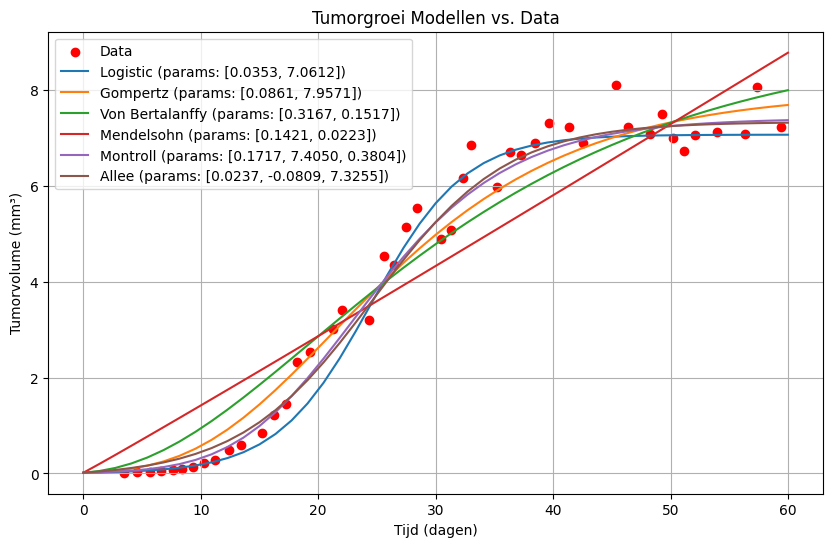

                                               Formule        AIC        BIC  \
Montroll               dV/dt = c * V * (V_max^d - V^d) -94.597424 -89.177437   
Allee            dV/dt = c * (V - V_min) * (V_max - V) -90.985155 -85.565167   
Gompertz                   dV/dt = c * V * ln(V_max/V) -74.744812 -71.131487   
Logistic                   dV/dt = c * V * (V_max - V) -70.101162 -66.487837   
Von Bertalanffy            dV/dt = c * V^(2/3) - d * V -43.393137 -39.779812   
Mendelsohn                             dV/dt = c * V^d  -4.979512  -1.366187   

                                  params  
Montroll          0.1717, 7.4050, 0.3804  
Allee            0.0237, -0.0809, 7.3255  
Gompertz                  0.0861, 7.9571  
Logistic                  0.0353, 7.0612  
Von Bertalanffy           0.3167, 0.1517  
Mendelsohn                0.1421, 0.0223  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basemodel import DataHandler, Evaluator, LogisticModel, GompertzModel, VonBertalanffyModel, MendelsohnModel, MontrollModel, AlleeModel

# Voeg hier je eigen data toe
t_data = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
V_data = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

# Instantieer de evaluator
evaluator = Evaluator(t_data, V_data)

# Definieer de modellen en beginwaarden voor parameters
t_forecast = np.linspace(0, 60, 45)
models = {
    'Logistic': (LogisticModel, [0.01, 7]),
    'Gompertz': (GompertzModel, [0.11, 7.5]),
    'Von Bertalanffy': (VonBertalanffyModel, [0.5, 0.2]),
    'Mendelsohn': (MendelsohnModel, [0.01, 0.1]),
    'Montroll': (MontrollModel, [0.01, 8, 0.1]),
    'Allee': (AlleeModel, [0.05, 0, 7.5])
}

# Modelvergelijking
results = evaluator.compare_models(models, t_forecast)

# Visualiseer de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(t_data, V_data, color="red", label="Data")

for model_name, result in results.items():
    params = result['params']  
    param_str = ", ".join([f"{p:.4f}" for p in params])  
    plt.plot(t_forecast, result['V_sim'], label=f"{model_name} (params: [{param_str}])")

plt.title("Tumorgroei Modellen vs. Data")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Tumorvolume (mm³)")
plt.legend()
plt.grid(True)
plt.show()

df = pd.DataFrame.from_dict(results, orient='index')
df = df[['Formule','AIC', 'BIC', 'params']].sort_values(by='AIC')

# Formatteer de parameters voor weergave in een tabel met vier decimalen
df['params'] = df['params'].apply(lambda x: ', '.join([f"{p:.4f}" for p in x]))

print(df)


Wil je meer cijfers achter de komma verander d 4f naar een hoger getal. Hieronder staat welke line code dat is.

## Plots

Je kunt natuurlijk ook de plots aanpassen als je wat programmeerervaring hebt in Python en Matplotlib. Met `figsize` kun je de grootte van de afbeelding aanpassen om beter op je scherm of publicatieformaat te passen.

De `%.4f` in de `param_str` kan worden aangepast om het aantal cijfers achter de komma te verhogen of te verlagen, afhankelijk van je vereisten voor precisie. Bijvoorbeeld, `%.2f` zal slechts twee cijfers achter de komma weergeven in plaats van vier.

Je kunt ook de `title`, `xlabel`, en `ylabel` van de plot aanpassen door de tekst tussen de haakjes te veranderen, zodat de visualisatie beter aansluit bij de boodschap die je wilt overbrengen. Bijvoorbeeld:
- `plt.title('Mijn aangepaste titel')`
- `plt.xlabel('Mijn aangepaste x-as label')`
- `plt.ylabel('Mijn aangepaste y-as label')`

Zo kun je je plots volledig personaliseren voor betere presentatie en analyse."


### Betere parameters

Wil je graag een nog betere kans op de beste parameters, dan kun je de onderstaande code in de `basemodel.py` aanpassen. Door de `num_iterations` naar een hoger getal te verhogen, duurt het model langer, maar vergroot je wel de kans om de beste parameters te vinden. Dit komt omdat het model meer mogelijkheden krijgt om het optimale resultaat te vinden.

Aan de andere kant, bij een lagere waarde voor de iteraties, zal je code sneller draaien, maar loop je het risico dat het model niet diep genoeg zoekt naar de optimale parameters.

Daarnaast kun je ook de `step_size` aanpassen – verlagen voor een preciezere en misschien betere uitkomst of verhogen voor een sneller, maar minder gedetailleerd zoekproces."


In [ ]:
def fit_and_evaluate(self, model_class, p0, t_forecast, num_iterations=10000, step_size=0.01):

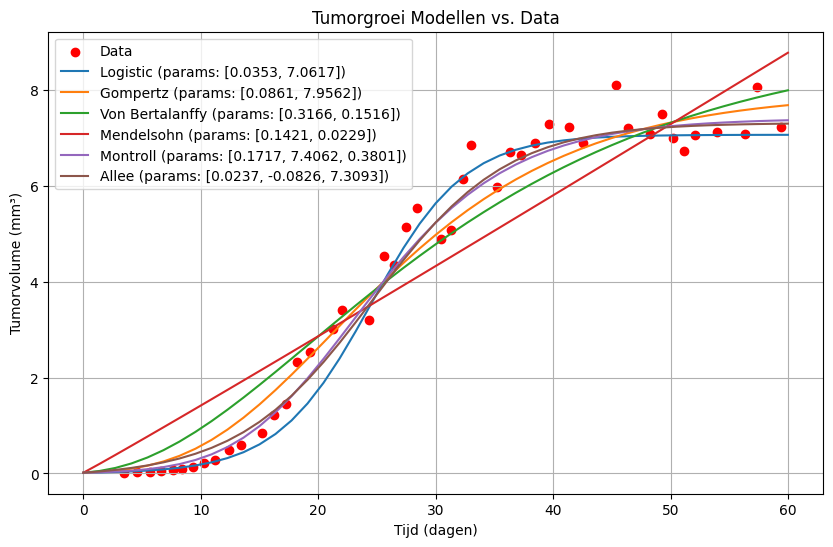

                                               Formule        AIC        BIC
Montroll               dV/dt = c * V * (V_max^d - V^d) -94.597069 -89.177082
Allee            dV/dt = c * (V - V_min) * (V_max - V) -91.051177 -85.631190
Gompertz                   dV/dt = c * V * ln(V_max/V) -74.744811 -71.131486
Logistic                   dV/dt = c * V * (V_max - V) -70.101451 -66.488126
Von Bertalanffy            dV/dt = c * V^(2/3) - d * V -43.393493 -39.780168
Mendelsohn                             dV/dt = c * V^d  -4.979474  -1.366149


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basemodel import DataHandler, Evaluator, LogisticModel, GompertzModel, VonBertalanffyModel, MendelsohnModel, MontrollModel, AlleeModel

# Voeg hier je eigen data toe
t_data = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
V_data = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

# Instantieer de evaluator
evaluator = Evaluator(t_data, V_data)

# Definieer de modellen en beginwaarden voor parameters
t_forecast = np.linspace(0, 60, 45)
models = {
    'Logistic': (LogisticModel, [0.01, 7]),
    'Gompertz': (GompertzModel, [0.11, 7.5]),
    'Von Bertalanffy': (VonBertalanffyModel, [0.5, 0.2]),
    'Mendelsohn': (MendelsohnModel, [0.01, 0.1]),
    'Montroll': (MontrollModel, [0.01, 8, 0.1]),
    'Allee': (AlleeModel, [0.05, 0, 7.5])
}

# Modelvergelijking
results = evaluator.compare_models(models, t_forecast)

# Visualiseer de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(t_data, V_data, color="red", label="Data")

for model_name, result in results.items():
    params = result['params']  
    param_str = ", ".join([f"{p:.4f}" for p in params])  
    plt.plot(t_forecast, result['V_sim'], label=f"{model_name} (params: [{param_str}])")

plt.title("Tumorgroei Modellen vs. Data")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Tumorvolume (mm³)")
plt.legend()
plt.grid(True)
plt.show()


df = pd.DataFrame.from_dict(results, orient='index')
df = df[['Formule','AIC', 'BIC']].sort_values(by='AIC')
print(df)


#### Uitleg eigen resultaten

**Akaike Information Criterion (AIC)**:
- De AIC-score meet de relatieve kwaliteit van een statistisch model voor een bepaalde dataset. Een lager AIC-waarde duidt op een beter model.
-  Een lager AIC suggereert een beter balans tussen nauwkeurigheid en complexiteit.

**Bayesian Information Criterion (BIC)**:
- De BIC is ook een maatstaf voor modelselectie, maar strikter dan de AIC. Het voegt een zwaardere strafterm aan de complexiteit van het model toe.
- Een lager BIC-waarde geeft aan dat het model beter is dan een hoger BIC-waarde.
- BIC geeft de voorkeur aan eenvoudiger modellen, vooral wanneer er veel parameters in het model zitten, omdat het een strengere penaliserende factor bevat.

**Interpreteren van de gegevens**:
- **Montroll** heeft de laagste AIC- en BIC-waarden, wat suggereert dat dit model de beste balans biedt tussen nauwkeurigheid en complexiteit voor de dataset die wordt gebruikt.
- **Mendelsohn** heeft de hoogste AIC- en BIC-waarden, wat aangeeft dat dit model minder goed presteert in termen van fit en complexiteit in vergelijking met de andere modellen.
- De lagere AIC en BIC van de **Gompertz**, **Logistic**, en **Von Bertalanffy** modellen ten opzichte van **Montroll** en **Allee** kunnen erop wijzen dat deze modellen een betere modelkeuze zijn in termen van eenvoud en precisie voor de dataset.

De parameters zijn de parameters die gebruikt zijn voor deze code run.

### Model met realistisch data

C:\Users\nakas\OneDrive\Documents\stat\casus\CasusC\differentiaalvergelijkingen\model\basemodel.py:128: RuntimeWarning: overflow encountered in scalar multiply
  return c * V * (V_max - V)
C:\Users\nakas\OneDrive\Documents\stat\casus\CasusC\differentiaalvergelijkingen\model\basemodel.py:429: RuntimeWarning: overflow encountered in square
  cost = np.sum((model(self.t_data, *new_params) - self.V_data) ** 2) # Bereken de afwijking voor de nieuwe parameters


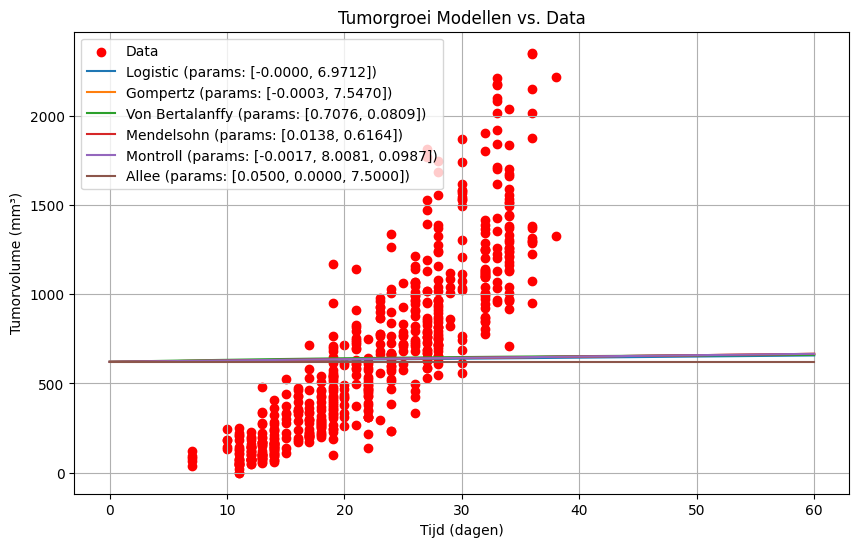

                                               Formule          AIC  \
Von Bertalanffy            dV/dt = c * V^(2/3) - d * V  7253.991313   
Gompertz                   dV/dt = c * V * ln(V_max/V)  7254.131528   
Mendelsohn                             dV/dt = c * V^d  7254.134929   
Logistic                   dV/dt = c * V * (V_max - V)  7254.193072   
Montroll               dV/dt = c * V * (V_max^d - V^d)  7256.131170   
Allee            dV/dt = c * (V - V_min) * (V_max - V)  7257.639757   

                         BIC                   params  
Von Bertalanffy  7262.727687           0.7076, 0.0809  
Gompertz         7262.867903          -0.0003, 7.5470  
Mendelsohn       7262.871303           0.0138, 0.6164  
Logistic         7262.929447          -0.0000, 6.9712  
Montroll         7269.235732  -0.0017, 8.0081, 0.0987  
Allee            7270.744318   0.0500, 0.0000, 7.5000  


In [15]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from basemodel import DataHandler, Evaluator, LogisticModel, GompertzModel, VonBertalanffyModel, MendelsohnModel, MontrollModel, AlleeModel

# Met realistische data
with open("tumor_growth.txt") as file:
            text = csv.reader(file, delimiter='\t')
            header = next(text)
            t_data = []
            V_data = []
            for line in text:
                t_data.append(float(line[1]))
                V_data.append(float(line[2]))
            t_data = [num for num in t_data]
            V_data = [num for num in V_data]

            # Convert back to lists if needed
            t_data = list(t_data)
            V_data = list(V_data)

# Instantieer de evaluator
evaluator = Evaluator(t_data, V_data)

# Definieer de modellen en beginwaarden voor parameters
t_forecast = np.linspace(0, 60, 583)
models = {
    'Logistic': (LogisticModel, [0.01, 7]),
    'Gompertz': (GompertzModel, [0.11, 7.5]),
    'Von Bertalanffy': (VonBertalanffyModel, [0.5, 0.2]),
    'Mendelsohn': (MendelsohnModel, [0.01, 0.1]),
    'Montroll': (MontrollModel, [0.01, 8, 0.1]),
    'Allee': (AlleeModel, [0.05, 0, 7.5])
}

# Modelvergelijking
results = evaluator.compare_models(models, t_forecast)

# Visualiseer de resultaten
plt.figure(figsize=(10, 6))
plt.scatter(t_data, V_data, color="red", label="Data")

for model_name, result in results.items():
    params = result['params']
    param_str = ", ".join([f"{p:.4f}" for p in params])
    plt.plot(t_forecast, result['V_sim'], label=f"{model_name} (params: [{param_str}])")

plt.title("Tumorgroei Modellen vs. Data")
plt.xlabel("Tijd (dagen)")
plt.ylabel("Tumorvolume (mm³)")
plt.legend()
plt.grid(True)
plt.show()

df = pd.DataFrame.from_dict(results, orient='index')
df = df[['Formule','AIC', 'BIC', 'params']].sort_values(by='AIC')

# Formatteer de parameters voor weergave in een tabel met vier decimalen
df['params'] = df['params'].apply(lambda x: ', '.join([f"{p:.4f}" for p in x]))

print(df)


#### Resultaten

De resultaten die je terugkrijgt zijn een grafiek van alle modellen, de beste parameters die voor die modellen zijn gevonden, en de AIC en BIC scores.
De waarde van AIC en BIC die eruit komen van de data komt overeen bijna overeen met de resultaat waarbij deze data is gebruikt. De initiële waarde moet aangepast worden om de model te fitten.